<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M3_Exercise_Session_1_ANN_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Artificial Neural Network

Before we look at why neural networks work, it’s important to understand what neural networks do. Before we can grasp the design of a neural network, we must first understand what a neuron performs.

1. First, a weight is being applied to each input to an artificial neuron. 
2. Second, the inputs are multiplied by their weights, and then a bias is applied to the outcome. This is called the weighted sum. 
3. Third, the weighted sum is processed via an activation function, as a non-linear function.

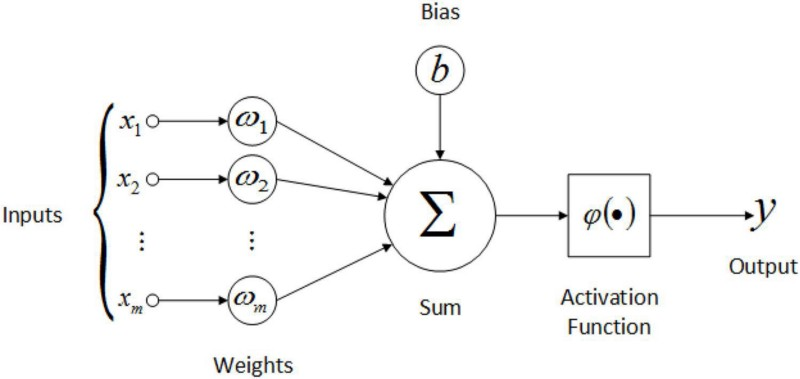

The neural network can compare the outputs of its nodes with the desired values using a property known as the delta rule, allowing the network to alter its weights through training to create more accurate output values. This training and learning procedure results in gradient descent. 

The technique of updating weights in multi-layered perceptrons is virtually the same, however, the process is referred to as back-propagation. In such circumstances, the output values provided by the final layer are used to alter each hidden layer inside the network.

In order to build a neural network, the following steps must be followed:

1. Creating a FeedForwardNetwork
2. FeedForward Evaluation
3. Backward / Gradient Calculation
4. Back Propagation
5. Training

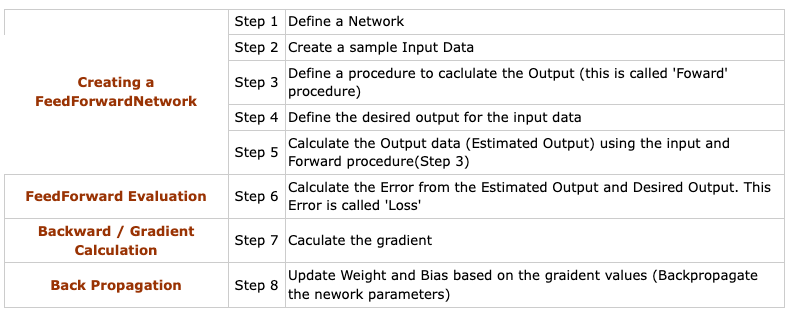

# PyTorch - nn.Linear: Creating a simple Artificial neural network with 1 node and training with 1 sample of data

nn.Linear(n,m) is a module that creates single layer feed forward network with n inputs and m output. Mathematically, this module is designed to calculate the linear equation Ax = b where x is input, b is output, A is weight. This is where the name 'Linear' came from.

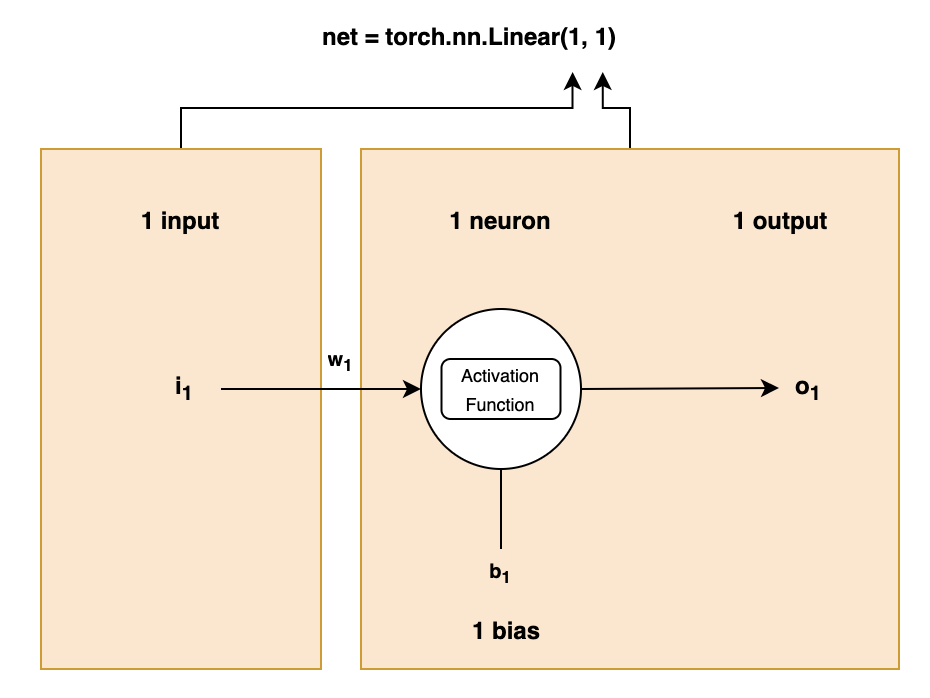

In [40]:
import torch

In [407]:
x = torch.tensor([[0.1]])
y = torch.tensor([[1.2]])
print("input:\n ",x)
print('Target:\n', y)

input:
  tensor([[0.1000]])
Target:
 tensor([[1.2000]])


In [351]:
print(x.dtype)
print(y.dtype)

torch.float32
torch.float32


## 1. Creating a FeedForwardNetwork

In [70]:
model_net1 = torch.nn.Linear(1,1)

In [71]:
print('network structure : torch.nn.Linear(1,1) :\n',model_net1)
print('Weight of network :\n',model_net1.weight)
print('Bias of network :\n',model_net1.bias)

network structure : torch.nn.Linear(1,1) :
 Linear(in_features=1, out_features=1, bias=True)
Weight of network :
 Parameter containing:
tensor([[0.9335]], requires_grad=True)
Bias of network :
 Parameter containing:
tensor([-0.0104], requires_grad=True)


In [72]:
# torch.mm(net.weight,x.t()) + net.bias

output = torch.nn.Sigmoid().forward(model_net1.forward(x))
print('Output :\n',output)

Output :
 tensor([[0.5207]], grad_fn=<SigmoidBackward0>)


## 2. FeedForward Evaluation

In [73]:
# NOTE : you see 'None' here since backward() hasn't been executed yet
print('Weight gradient \n',model_net1.weight.grad)
print('Bias gradient :\n',model_net1.bias.grad)

Weight gradient 
 None
Bias gradient :
 None


In [74]:
# define the error function (loss fuction)
loss_mse = torch.nn.MSELoss()
loss = loss_mse(output, y)
print('Loss :\n',loss)

Loss :
 tensor(0.4614, grad_fn=<MseLossBackward0>)


##3. Backward / Gradient Calculation

In [75]:
loss.backward()

In [76]:
print('Weight gradient: \n', model_net1.weight.grad)
print('Bias gradient: \n', model_net1.bias.grad)

Weight gradient: 
 tensor([[-0.0339]])
Bias gradient: 
 tensor([-0.3390])


##4. Back Propagation

In [77]:
print('Weight of network:\n', model_net1.weight)
print('Bias of network:\n', model_net1.bias)

Weight of network:
 Parameter containing:
tensor([[0.9335]], requires_grad=True)
Bias of network:
 Parameter containing:
tensor([-0.0104], requires_grad=True)


In [78]:
optimizer = torch.optim.RMSprop(model_net1.parameters(), lr=0.05)
optimizer.step()

In [79]:
print('New Weight of network :\n',model_net1.weight)
print('New Bias of network :\n',model_net1.bias)

New Weight of network :
 Parameter containing:
tensor([[1.4335]], requires_grad=True)
New Bias of network :
 Parameter containing:
tensor([0.4896], requires_grad=True)


In [80]:
output = torch.nn.Sigmoid().forward(model_net1.forward(x))

print('Output :\n',output)

Output :
 tensor([[0.6532]], grad_fn=<SigmoidBackward0>)


## 5. Training

In [408]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error

epochs = 100
learning_rate = 0.1
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net1 = torch.nn.Linear(1,1)
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net1.parameters(), lr=learning_rate)


for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      output = torch.nn.Sigmoid().forward(model_net1.forward(x))
      # 2. FeedForward Evaluation
      loss = loss_mse(output, y)
      optimizer.zero_grad();

      # 3. Backward / Gradient Calculation
      loss.backward()

      #display_loss:
      loss_set[i] = loss

      if (i % 10)==0:
        print (f"Loss: {list(loss_set.values())[i]}")
      # 4. Back Propagation
      optimizer.step()

<ipython-input-408-1ddfdf7f4253>:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.2439805418252945
Loss: 0.05415269732475281
Loss: 0.04791970178484917
Loss: 0.045479316264390945
Loss: 0.044157661497592926
Loss: 0.04332425072789192
Loss: 0.042749322950839996
Loss: 0.04232829809188843
Loss: 0.04200659319758415
Loss: 0.041752755641937256


# PyTorch - nn.Linear: Creating a simple Artificial neural network with 1 node and training with a dataset

In [410]:
# load dataset (Swedish Auto Insurance dataset)
data = pd.read_excel('/content/slr06.xls', engine='xlrd')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [411]:
# define input (X) and output (y)

X_tensor = torch.tensor(data.iloc[:, :-1].astype(np.float32).values)
y_tensor = torch.tensor(data.iloc[:, -1:].astype(np.float32).values)

In [412]:
print(X_tensor.dtype)
print(y_tensor.dtype)

torch.float32
torch.float32


In [413]:
print(X_tensor.shape)
print(y_tensor.shape)

torch.Size([63, 1])
torch.Size([63, 1])


## 5. Training ANN through Swedish Auto Insurance dataset


In [414]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net2 = torch.nn.Linear(1,1)
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net2.parameters(), lr=learning_rate)


for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = torch.nn.LogSigmoid().forward(model_net2.forward(x.float()))
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-414-d719fbe48267>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 19103.45703125
Loss: 17147.724609375
Loss: 17145.953125
Loss: 17145.80859375
Loss: 17145.798828125
Loss: 17145.796875
Loss: 17145.796875
Loss: 17145.796875
Loss: 17145.796875
Loss: 17145.796875


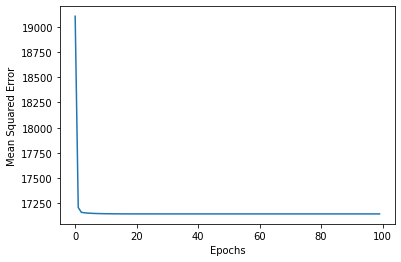

In [415]:
import matplotlib.pyplot as plt

plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

Based on Churn data, please build a simple neural network classifier model using PyTorch.

In [381]:
import pandas as pd

data_raw = pd.read_csv('/content/customer_churn_data_n.csv')


In [382]:
# from sklearn.preprocessing import LabelBinarizer
# data_raw['gender_encod'] = LabelBinarizer().fit_transform(data_raw['gender'])
# data_raw['churn_encod'] = LabelBinarizer().fit_transform(data_raw['Churn'])


In [383]:
# Import Libraries
import torch
import torch.nn as nn
import numpy as np

In [384]:
data_x = torch.tensor(data_raw[['gender_encod', 'SeniorCitizen']].values.astype(np.float32))
data_y = torch.tensor(data_raw[['churn_encod']].values.astype(np.float32))


In [385]:
print(data_x.size())
print(data_y.size())

torch.Size([7032, 2])
torch.Size([7032, 1])


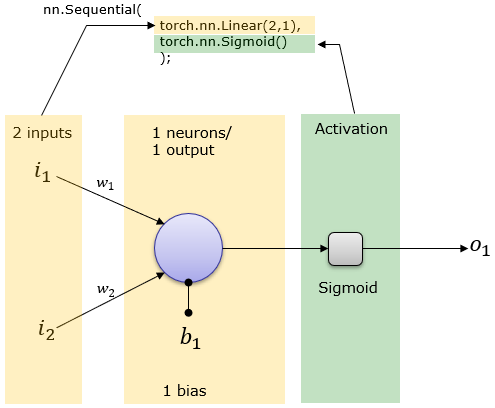

## 5. Training ANN through Customer churn dataset

In [421]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

epochs = 10
learning_rate = 0.001
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net3 = torch.nn.Sequential(torch.nn.Linear(2,1),
                                 torch.nn.Sigmoid());
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net3.parameters(), lr=learning_rate)

for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(data_x, data_y):
          output = model_net3.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 1)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-421-b62972ea37d6>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/10 [00:00<?, ?epoch/s]

Loss: 0.21632425487041473
Loss: 0.19345709681510925
Loss: 0.19146029651165009
Loss: 0.19103126227855682
Loss: 0.19093061983585358
Loss: 0.19090430438518524
Loss: 0.19089651107788086
Loss: 0.19089384377002716
Loss: 0.1908928006887436
Loss: 0.1908923089504242


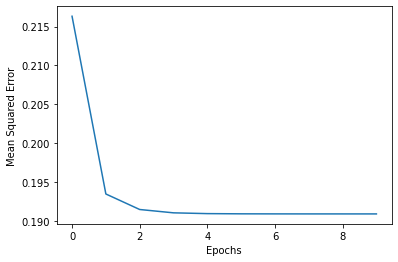

In [422]:
import matplotlib.pyplot as plt

plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

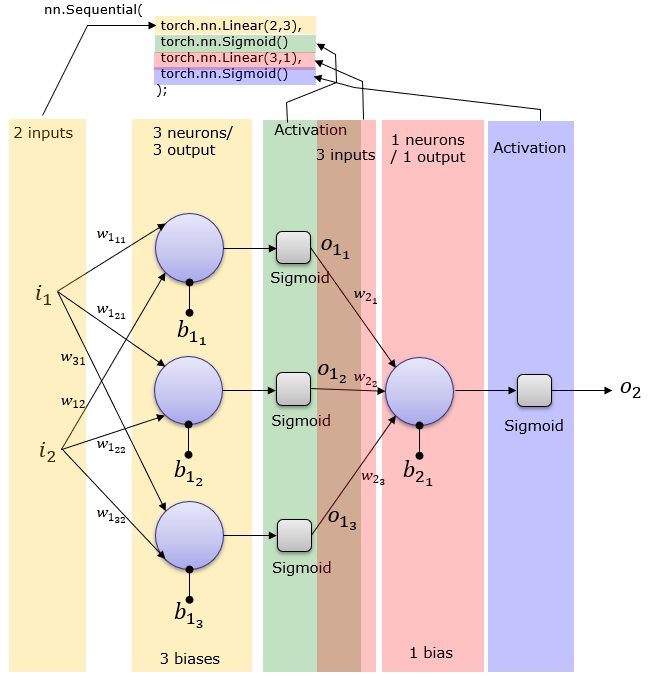

## 5. Training ANN through Customer churn dataset with 1 hidden layer

In [424]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

epochs = 10
learning_rate = 0.001
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net4 = torch.nn.Sequential(torch.nn.Linear(2,3),
                                 torch.nn.Sigmoid(),
                                 torch.nn.Linear(3,1),
                                 torch.nn.Sigmoid()
                                 );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net4.parameters(), lr=learning_rate)


for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(data_x, data_y):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 1)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-424-30fc3d548745>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/10 [00:00<?, ?epoch/s]

Loss: 0.19686219096183777
Loss: 0.19267652928829193
Loss: 0.1915706992149353
Loss: 0.1911473572254181
Loss: 0.19102193415164948
Loss: 0.19099114835262299
Loss: 0.19098544120788574
Loss: 0.1909852921962738
Loss: 0.19098599255084991
Loss: 0.19098664820194244


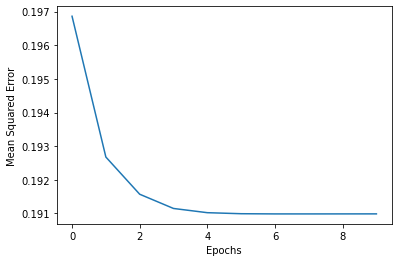

In [425]:
import matplotlib.pyplot as plt

plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [432]:
data_x_4 = torch.tensor(data_raw[['gender_encod', 'SeniorCitizen', 'TotalCharges', 'MonthlyCharges']].values.astype(np.float32))
data_y_4 = torch.tensor(data_raw[['churn_encod']].values.astype(np.float32))


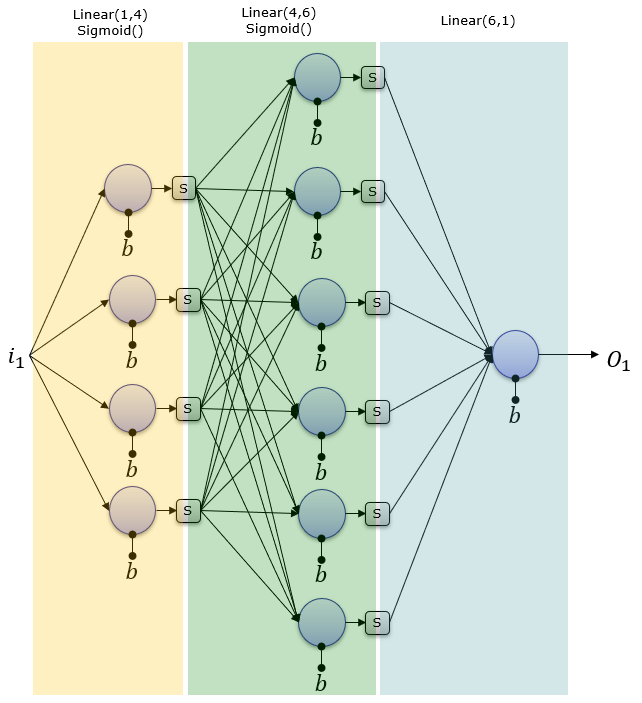

## 5. Training ANN through Customer churn dataset with 2 hidden layers

In [433]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

# 1. Creating a FeedForwardNetwork
model_net5 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
optimizer = torch.optim.RMSprop(model_net5.parameters(), lr=learning_rate)
loss_mse = torch.nn.MSELoss()
epochs = 100
learning_rate = 0.01
loss_set = {}



for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(data_x_4, data_y_4):
          output = model_net5.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-433-b4c3595d720a>:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.19206225872039795
Loss: 0.1586792916059494
Loss: 0.15719802677631378
Loss: 0.1566017121076584
Loss: 0.1561173051595688
Loss: 0.1553793102502823
Loss: 0.1552339494228363
Loss: 0.15517862141132355
Loss: 0.15487179160118103
Loss: 0.15467338263988495


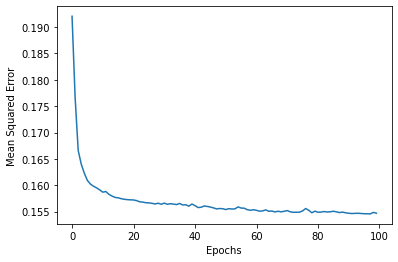

In [435]:
import matplotlib.pyplot as plt

plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

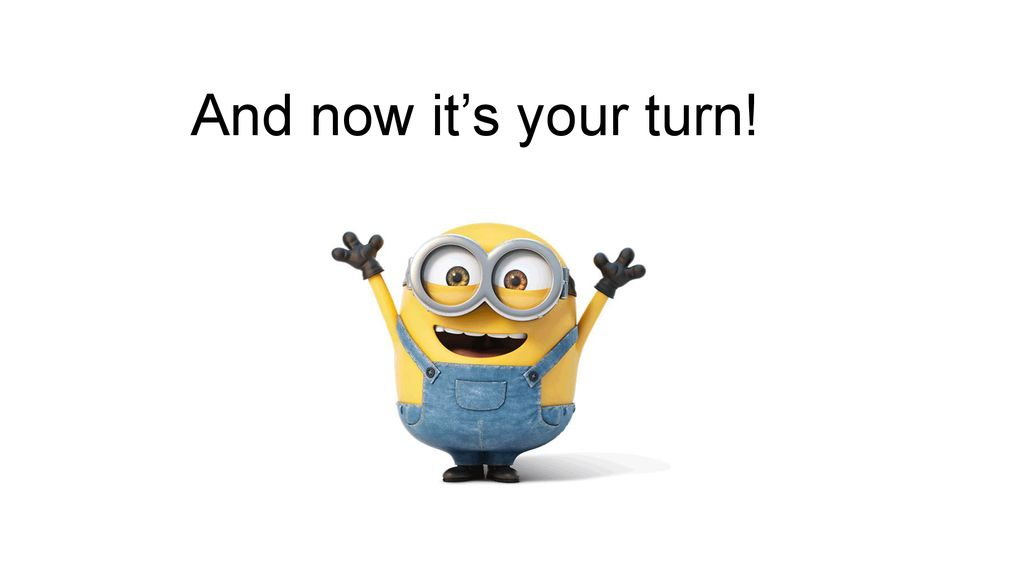

Train a ANN through Swedish Auto Insurance with 1 or 2 hidden layers!

In [419]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net4 = torch.nn.Sequential(torch.nn.Linear(1,3),
                                 torch.nn.ReLU(),
                                 torch.nn.Linear(3,1),
                                 torch.nn.ReLU()
                                 );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net4.parameters(), lr=learning_rate)


for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-419-fcfbc58db281>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 7129.189453125
Loss: 1344.515380859375
Loss: 1313.4482421875
Loss: 1301.725341796875
Loss: 1298.550537109375
Loss: 1298.556884765625
Loss: 1299.4228515625
Loss: 1300.304443359375
Loss: 1300.9771728515625
Loss: 1301.43310546875


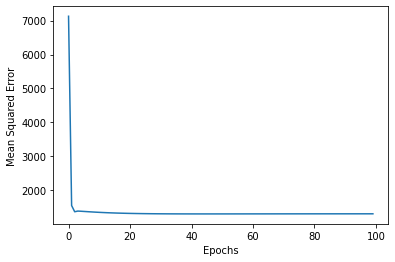

In [420]:
import matplotlib.pyplot as plt

plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()